# Week 4: Individual Coding Assignment
by Pawan (Sine) Polcharoen

In this notebook, I will be exploring one of the two main data sets for my final group project. The data set contains top Spotify songs by country for the month of May 2020. Additionally, there are characteristic columns that quantify musical aspects of each songs, such as danceability, energy, genre, and etc. In this notebook, I will be creating various charts to help deepen my understanding of the data and the relationships it presents.

## Setting Up
First, I am importing all the libraries I need for this exploration.

In [98]:
# to manipulate data
import pandas as pd

# to manipulate and visualize spatial data
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt

To start the exploration, I will import the May 2020 data file in as an object named `sdf`.

In [96]:
sdf = pd.read_csv('data/spotify_may2020.csv')

## Preliminary Inspection
What are the dimensions of my data set?

In [97]:
sdf.shape

(2572, 29)

I have 29 variables/columns and 2572 observations.

What are my column names? What are their data types?

In [95]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208352 entries, 0 to 208351
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              208352 non-null  object 
 1   Position          208352 non-null  int64  
 2   Artist            208352 non-null  object 
 3   Streams           208352 non-null  int64  
 4   Country           208352 non-null  object 
 5   Date2             208352 non-null  object 
 6   Title             208352 non-null  object 
 7   danceability      208352 non-null  float64
 8   energy            208352 non-null  float64
 9   key               208352 non-null  int64  
 10  loudness          208352 non-null  float64
 11  mode              208352 non-null  int64  
 12  speechiness       208352 non-null  float64
 13  acousticness      208352 non-null  float64
 14  instrumentalness  208352 non-null  float64
 15  liveness          208352 non-null  float64
 16  valence           20

The output from the command `info` gives me all the column names in my data set, as well as the number of observations within each column, whether there are any null values, and the data type of each column.

Now, let's look at a small chunk of the data.

In [27]:
sdf.head()

,Country,Continent,Rank,Title,Artists,Album,Explicit,Duration,danceability,energy,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,Unnamed..0,title
0,Global,Global,1,Rain On Me (with Ariana Grande),"Lady Gaga, Ariana Grande",Rain On Me (with Ariana Grande),0,3:02,0.672,0.855,...,audio_features,24ySl2hOPGCDcxBxFIqWBu,spotify:track:24ySl2hOPGCDcxBxFIqWBu,https://api.spotify.com/v1/tracks/24ySl2hOPGCD...,https://api.spotify.com/v1/audio-analysis/24yS...,182200,4,Pop,NaN,NaN
1,Global,Global,2,Blinding Lights,The Weeknd,After Hours,0,3:20,0.518,0.727,...,audio_features,5Sg09MvHqNWPWsYeuY2toY,spotify:track:5Sg09MvHqNWPWsYeuY2toY,https://api.spotify.com/v1/tracks/5Sg09MvHqNWP...,https://api.spotify.com/v1/audio-analysis/5Sg0...,200046,4,RnB,NaN,NaN
2,Global,Global,2,Blinding Lights,The Weeknd,After Hours,0,3:20,0.513,0.796,...,audio_features,0sf12qNH5qcw8qpgymFOqD,spotify:track:0sf12qNH5qcw8qpgymFOqD,https://api.spotify.com/v1/tracks/0sf12qNH5qcw...,https://api.spotify.com/v1/audio-analysis/0sf1...,201573,4,Pop,NaN,NaN
3,Global,Global,3,ROCKSTAR (feat. Roddy Ricch),"DaBaby, Roddy Ricch",BLAME IT ON BABY,1,3:01,0.746,0.690,...,audio_features,7ytR5pFWmSjzHJIeQkgog4,spotify:track:7ytR5pFWmSjzHJIeQkgog4,https://api.spotify.com/v1/tracks/7ytR5pFWmSjz...,https://api.spotify.com/v1/audio-analysis/7ytR...,181733,4,Underground Rap,NaN,NaN
4,Global,Global,3,ROCKSTAR (feat. Roddy Ricch),"DaBaby, Roddy Ricch",BLAME IT ON BABY,1,3:01,0.746,0.690,...,audio_features,7ytR5pFWmSjzHJIeQkgog4,spotify:track:7ytR5pFWmSjzHJIeQkgog4,https://api.spotify.com/v1/tracks/7ytR5pFWmSjz...,https://api.spotify.com/v1/audio-analysis/7ytR...,181733,4,Rap,NaN,NaN


From the `head` command, I get the first five rows of the data set. From this output, I am able to gain a better understanding of the structure of the data and the individual observations within.

## Subsetting the data
As shown in the Preliminary Inspection, there are many variables within this data set. Thus, I am going to subset the data with only the variables I want to look at for the project. 

First, I am using the `list` command to get a list of all the column names.

In [28]:
list(sdf)

['Country',
 'Continent',
 'Rank',
 'Title',
 'Artists',
 'Album',
 'Explicit',
 'Duration',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'duration_ms',
 'time_signature',
 'genre',
 'Unnamed..0',
 'title']

Now that I have all the column names, I can create a new object `columns_to_keep` with the columns I intend to keep. Afterwards, I can edit my original data frame `sdf` to only include the kept columns.

In [99]:
## subset it
columns_to_keep = ['Country',
 'Continent',
 'Rank',
 'Title',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'genre']
sdf = sdf[columns_to_keep]
sdf.head()

,Country,Continent,Rank,Title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,genre
0,Global,Global,1,Rain On Me (with Ariana Grande),0.672,0.855,9,-3.764,1,0.0397,0.02100,0.000000,0.3230,0.646,Pop
1,Global,Global,2,Blinding Lights,0.518,0.727,1,-5.947,1,0.0557,0.00153,0.000152,0.0882,0.342,RnB
2,Global,Global,2,Blinding Lights,0.513,0.796,1,-4.075,1,0.0629,0.00147,0.000209,0.0938,0.345,Pop
3,Global,Global,3,ROCKSTAR (feat. Roddy Ricch),0.746,0.690,11,-7.956,1,0.1640,0.24700,0.000000,0.1010,0.497,Underground Rap
4,Global,Global,3,ROCKSTAR (feat. Roddy Ricch),0.746,0.690,11,-7.956,1,0.1640,0.24700,0.000000,0.1010,0.497,Rap


As shown in the output from the `head` command, the data have been cut down to only include the columns I subsetted.

## Removing Global rows
In this data set, there are observations from the Global music charts on Spotify. Although this is interesting data, it could skew the rest of the data that revolves around specific countries. To fix this, I will be removing all rows with the 'Global' Country value.

In [30]:
sdf = sdf[sdf.Country != 'Global']
sdf.head()

,Country,Continent,Rank,Title,Artists,Album,Explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
81,Argentina,South America,9,Tattoo,Rauw Alejandro,Tattoo,0,0.566,0.766,2,...,1,0.0399,0.43100,0.000000,0.1010,0.547,168.005,233467,4,RnB
82,Argentina,South America,9,Tattoo,Rauw Alejandro,Tattoo,0,0.566,0.766,2,...,1,0.0399,0.43100,0.000000,0.1010,0.547,168.005,233467,4,RnB
83,Argentina,South America,11,Tusa,"KAROL G, Nicki Minaj",Tusa,0,0.803,0.715,2,...,1,0.2980,0.29500,0.000134,0.0574,0.574,202.170,200960,4,Pop
84,Argentina,South America,19,Blinding Lights,The Weeknd,After Hours,0,0.518,0.727,1,...,1,0.0557,0.00153,0.000152,0.0882,0.342,170.962,200046,4,RnB
85,Argentina,South America,19,Blinding Lights,The Weeknd,After Hours,0,0.513,0.796,1,...,1,0.0629,0.00147,0.000209,0.0938,0.345,171.017,201573,4,Pop


As shown in the output from the `head` command, the Global rows have now been removed.

## Genre Exploration
The first variable I want to explore is genre. First, I will use `value_counts()` to see the counts within each genre type.

In [31]:
sdf['genre'].value_counts()

Pop                897
Rap                470
Underground Rap    341
Dark Trap          245
RnB                232
Hiphop             204
Emo                 93
Trap Metal           9
Name: genre, dtype: int64

The data set contains eight genres. The output from `value_counts()` lets us know how many observations are in each genre category.

With this information, I am going to save it to a new object `genre_count`.

In [32]:
genre_count = sdf['genre'].value_counts()
genre_count

Pop                897
Rap                470
Underground Rap    341
Dark Trap          245
RnB                232
Hiphop             204
Emo                 93
Trap Metal           9
Name: genre, dtype: int64

Next, I will convert the series into a data frame.

In [33]:
genre_count = genre_count.reset_index()
genre_count

,index,genre
0,Pop,897
1,Rap,470
2,Underground Rap,341
3,Dark Trap,245
4,RnB,232
5,Hiphop,204
6,Emo,93
7,Trap Metal,9


Now that I have a new data frame with the genre counts, I will rename the column names.

In [34]:
# current columns as a list
genre_count.columns.to_list()

# rename
genre_count.columns = ['genre', 'count']
genre_count

,genre,count
0,Pop,897
1,Rap,470
2,Underground Rap,341
3,Dark Trap,245
4,RnB,232
5,Hiphop,204
6,Emo,93
7,Trap Metal,9


Through the above code, I have successfully renamed the column names to 'genre' and 'count' for better understanding.

With this data frame, I can create some visuals, starting off with a simple `plot` command.

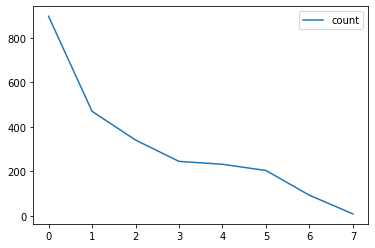

In [35]:
# quick plot
genre_count.plot()

Although that plot is cool, I can get much more information from a bar plot.

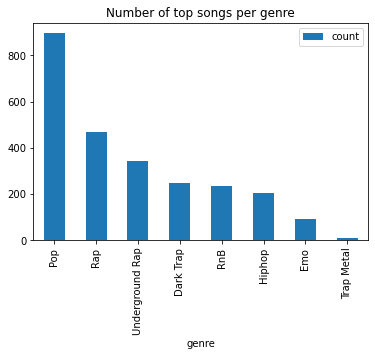

In [38]:
# Bar Plot
genre_count.plot.bar(x = 'genre', y = 'count', title = 'Number of top songs per genre')

In the above bar plot, I am able to see the number of top songs within each genre category. 

## Plotting Song Characteristics
Other than genre, I also want to explore the distribution of the various song characteristics given in the data set. These include danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, and valence. In the following code, I will create multiple histograms that plot each of these variables, starting with danceability and energy.

Text(0.5, 1.0, 'energy')

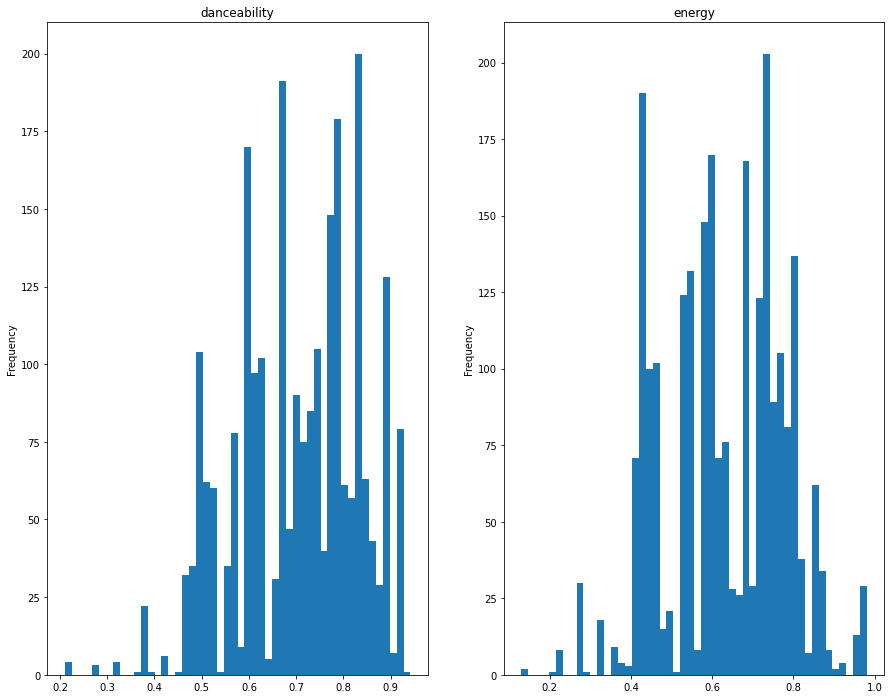

In [74]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize = (15,12))

# name each subplot
ax1, ax2 = axs

# danceability plot
sdf['danceability'].plot.hist(bins=50, ax=ax1)

ax1.set_title("danceability")

# energy plot
sdf['energy'].plot.hist(bins=50, ax=ax2)

ax2.set_title("energy")

Within the top songs during May 2020, there seems to be a preference for songs with mid to high danceability and energy.

Next, loudness and speechiness.

Text(0.5, 1.0, 'speechiness')

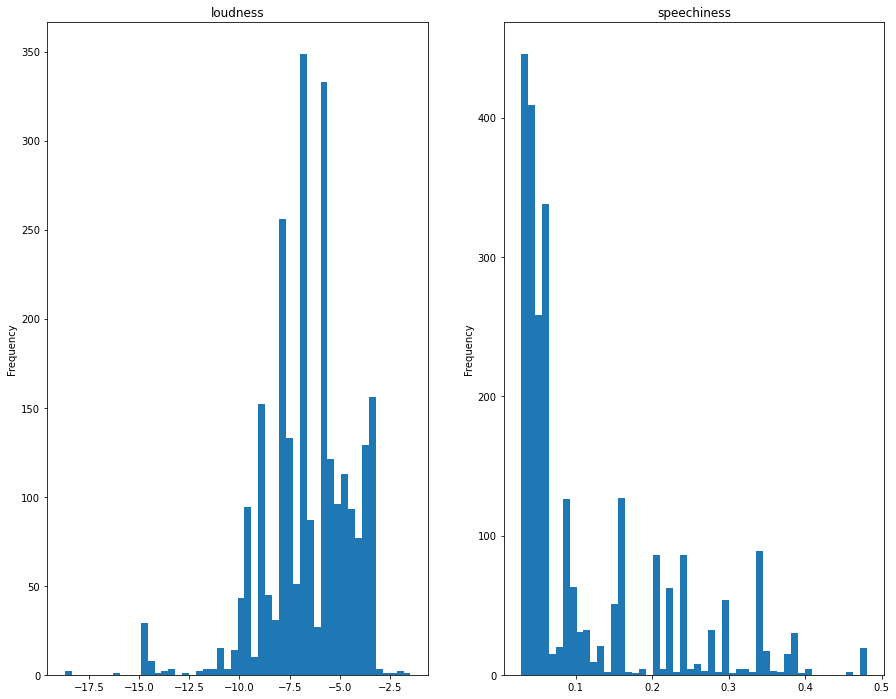

In [73]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize = (15,12))

# name each subplot
ax1, ax2 = axs

# loudness plot
sdf['loudness'].plot.hist(bins=50, ax=ax1)

ax1.set_title("loudness")

# speechiness plot
sdf['speechiness'].plot.hist(bins=50, ax=ax2)

ax2.set_title("speechiness")

Within the top songs during May 2020, there seems to be a preference for songs with mid to high loudness and songs with low speechiness.

Next, acousticness and instrumentalness.

Text(0.5, 1.0, 'instrumentalness')

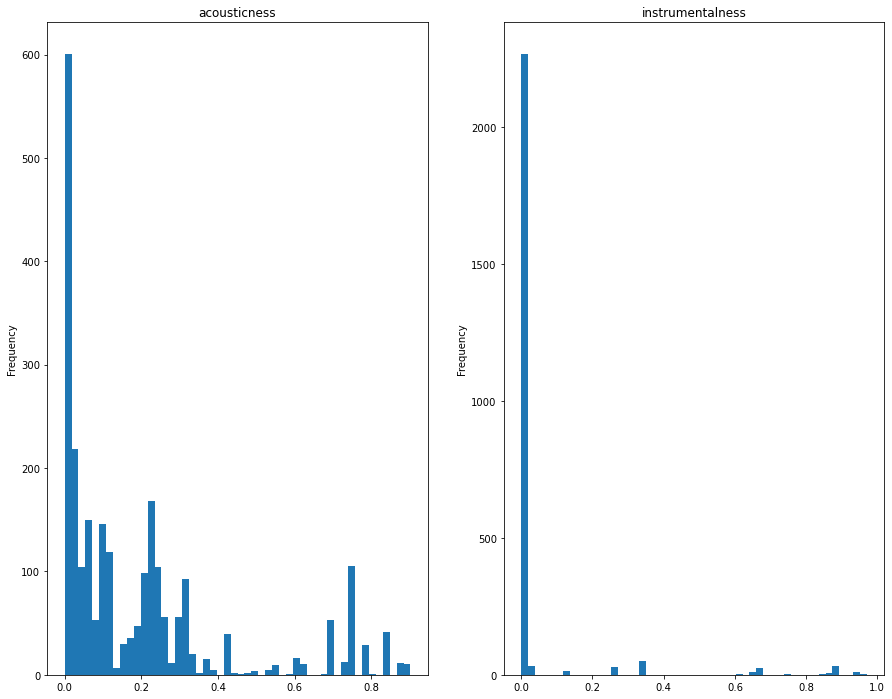

In [78]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize = (15,12))

# name each subplot
ax1, ax2 = axs

# acousticness plot
sdf['acousticness'].plot.hist(bins=50, ax=ax1)

ax1.set_title("acousticness")

# instrumentalness plot
sdf['instrumentalness'].plot.hist(bins=50, ax=ax2)

ax2.set_title("instrumentalness")

Within the top songs during May 2020, there seems to be a preference for songs with low acousticness. A majority of the top songs have zero instrumentalness, meaning that they all have vocals/lyrics.

Finally, liveness and valence. For context, valence describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (happy, cheerful, euphoric), while tracks with low valence sound more negative (sad, depressed, angry).

Text(0.5, 1.0, 'valence')

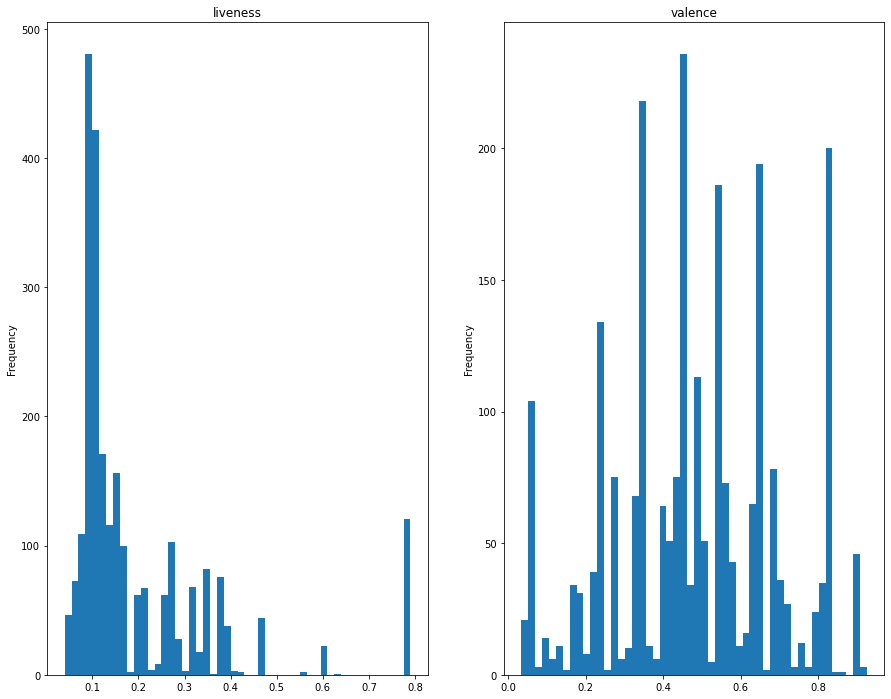

In [79]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize = (15,12))

# name each subplot
ax1, ax2 = axs

# liveness plot
sdf['liveness'].plot.hist(bins=50, ax=ax1)

ax1.set_title("liveness")

# valence plot
sdf['valence'].plot.hist(bins=50, ax=ax2)

ax2.set_title("valence")

Within the top songs during May 2020, there seems to be a preference for songs with low liveness. The distribution for valence is quite random, indicating that it is not a large factor in determining whether a song would be popular.

### Final Thoughts and Future Goals
Overall, I feel that I have a much better idea now of what the data set contains. In the future, I hope to create maps that show the density of certain song characteristics between different countries. At this point, I am not sure how to create maps from a .csv file, but I hope to learn either in class, through office hours, or just through the internet and trail and error.